## Principal Component Analysis

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of high-dimensional data while retaining as much information as possible. The goal of PCA is to find a new set of variables, called principal components, that captures most of the variance in the original data.

In other words, PCA takes a dataset with many variables and transforms it into a smaller set of variables that still contains the most important information about the data. This is accomplished by finding linear combinations of the original variables that explain the most variation in the data. These linear combinations are the principal components.

The first principal component captures the most variation in the data, and each subsequent component captures as much variation as possible while being orthogonal (i.e., uncorrelated) to the previous components. The number of principal components to keep is typically determined by the amount of variance they explain, with a common rule of thumb being to keep enough components to explain at least 70% to 80% of the variance.


In [27]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine


In [3]:
# load in the wine data
wine = load_wine()

data = pd.DataFrame(wine.data, columns = wine.feature_names)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

pca.fit(data_scaled)
components = pca.fit_transform(data_scaled)

print(pca)

PCA(n_components=0.95)


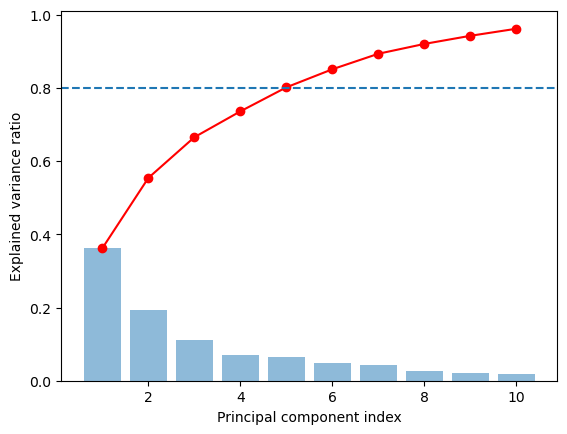

In [36]:
fig, ax = plt.subplots()
xi = range(1, pca.n_components_+1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.bar(xi, pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual explained variance')
plt.plot(xi, y , '-o', label='Cumulative explained variance',
         color='red')

plt.axhline(0.8, linestyle = '--')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()
plt.show()

In [42]:
import plotly.express as px

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

features = wine.feature_names

fig = px.scatter(components, x=0, y=1, color = wine.target)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()